Eg for set 1: 0.7073 ± 0.0086 eV
Eg for set 2: 0.7346 ± 0.0066 eV
Eg for set 3: 0.7778 ± 0.0171 eV


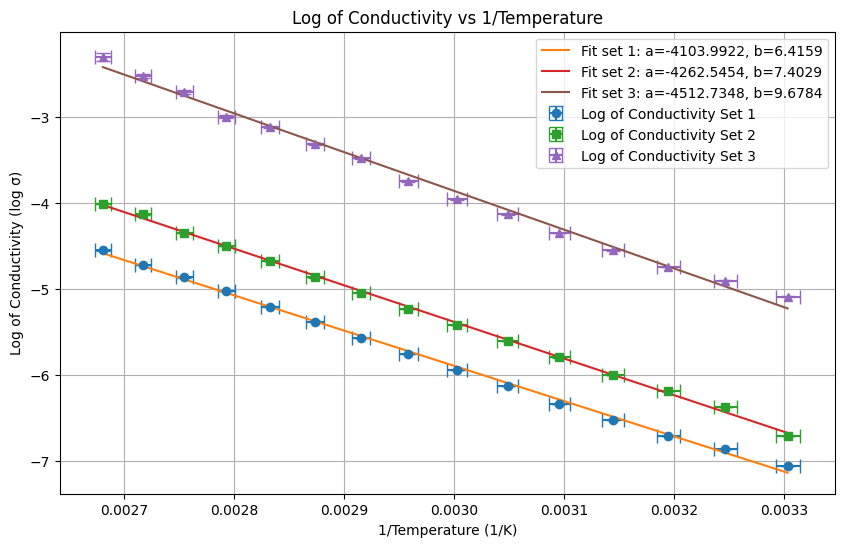

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Data extracted from the images
inverse_temperatures = np.array([0.0033033, 0.00324675, 0.00319489, 0.00314465, 0.00309598, 0.00304878, 0.003003, 0.00295858, 0.00291545, 0.00287356, 0.00283286, 0.0027933, 0.00275482, 0.00271739, 0.00268097])
log_conductivities_set1 = np.array([-7.0585782, -6.8685346, -6.7089044, -6.5224929, -6.3367757, -6.1330281, -5.9407714, -5.7540237, -5.5701261, -5.381699, -5.2066502, -5.0267647, -4.8678345, -4.7228282, -4.553527])
errors_set1 = np.array([0.00023558, 0.000288462, 0.000327869, 0.000340136, 0.00051977, 0.00052995, 0.00064388, 0.000788644, 0.000944882, 0.001512174, 0.001368613, 0.001631098, 0.001924577, 0.002227222, 0.002630579])

log_conductivities_set2 = np.array([-6.7089044, -6.3712619, -6.1899155, -6.0035371, -5.7991927, -5.6075636, -5.4171009, -5.234404, -5.0436751, -4.8678345, -4.6777409, -4.4999097, -4.350528, -4.1351666, -4.0074332])
errors_set2 = np.array([0.00032787, 0.00049036, 0.00053659, 0.00060729, 0.00075908, 0.00092643, 0.0011306, 0.00133208, 0.0016124, 0.002481, 0.00232528, 0.00278128, 0.0032481, 0.004, 0.00454345])

log_conductivities_set3 = np.array([-5.0913032, -4.9049248, -4.7444323, -4.553527, -4.350528, -4.1351666, -3.9606882, -3.7494791, -3.4812151, -3.314286, -3.1136153, -2.9957323, -2.7080002, -2.5257286, -2.3025851])
errors_set3 = np.array([0.00154472, 0.00148885, 0.00127141, 0.00205365, 0.00322841, 0.00476115, 0.00796255, 0.00995411, 0.00901796, 0.0111141, 0.0125, 0.0166667, 0.02, 0.025, 0.05])

errors_inverse_temperatures = np.array([1.08922E-05, 1.05414E-05, 1.02073E-05, 9.88885E-06, 9.58506E-06, 9.29506E-06, 9.01803E-06, 8.75319E-06, 8.49986E-06, 8.25737E-06, 8.0251E-06, 7.8025E-06, 7.58904E-06, 7.38422E-06, 7.18757E-06])

# Linear function for fitting
def linear_func(T, a, b):
    return a * T + b

# Fit data to linear function
params1, params_cov1 = curve_fit(linear_func, inverse_temperatures, log_conductivities_set1)
params2, params_cov2 = curve_fit(linear_func, inverse_temperatures, log_conductivities_set2)
params3, params_cov3 = curve_fit(linear_func, inverse_temperatures, log_conductivities_set3)

# Extracting the slope errors from the covariance matrix
slope_error1 = np.sqrt(params_cov1[0, 0])
slope_error2 = np.sqrt(params_cov2[0, 0])
slope_error3 = np.sqrt(params_cov3[0, 0])

# Constants
k_B = 8.617333262e-5  # Boltzmann constant in eV/K

# Calculate Eg and its error
Eg1 = -params1[0] * 2 * k_B
Eg1_error = slope_error1 * 2 * k_B

Eg2 = -params2[0] * 2 * k_B
Eg2_error = slope_error2 * 2 * k_B

Eg3 = -params3[0] * 2 * k_B
Eg3_error = slope_error3 * 2 * k_B

# Print the results
print(f"Eg for set 1: {Eg1:.4f} ± {Eg1_error:.4f} eV")
print(f"Eg for set 2: {Eg2:.4f} ± {Eg2_error:.4f} eV")
print(f"Eg for set 3: {Eg3:.4f} ± {Eg3_error:.4f} eV")

# Generate fit lines
fit_line1 = linear_func(inverse_temperatures, *params1)
fit_line2 = linear_func(inverse_temperatures, *params2)
fit_line3 = linear_func(inverse_temperatures, *params3)

# Plot data and fits
plt.figure(figsize=(10, 6))
plt.errorbar(inverse_temperatures, log_conductivities_set1, yerr=errors_set1, xerr=errors_inverse_temperatures, fmt='o', label='Log of Conductivity Set 1', capsize=5)
plt.plot(inverse_temperatures, fit_line1, '-', label=f'Fit set 1: a={params1[0]:.4f}, b={params1[1]:.4f}')

plt.errorbar(inverse_temperatures, log_conductivities_set2, yerr=errors_set2, xerr=errors_inverse_temperatures, fmt='s', label='Log of Conductivity Set 2', capsize=5)
plt.plot(inverse_temperatures, fit_line2, '-', label=f'Fit set 2: a={params2[0]:.4f}, b={params2[1]:.4f}')

plt.errorbar(inverse_temperatures, log_conductivities_set3, yerr=errors_set3, xerr=errors_inverse_temperatures, fmt='^', label='Log of Conductivity Set 3', capsize=5)
plt.plot(inverse_temperatures, fit_line3, '-', label=f'Fit set 3: a={params3[0]:.4f}, b={params3[1]:.4f}')

plt.xlabel('1/Temperature (1/K)')
plt.ylabel('Log of Conductivity (log σ)')
plt.title('Log of Conductivity vs 1/Temperature')
plt.legend()
plt.grid(True)
plt.show()